In [71]:
import nest
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
nest.helpdesk()

# Part 1

### a single neuron

In [3]:
# create a setup with a single neuron connected to a multimeter and a spike detector
neuron0 = nest.Create(("iaf_neuron"), params={"I_e":376.0})
multimeter = nest.Create("multimeter", params={"withtime":True,"record_from":["V_m"]})
spikedetector = nest.Create("spike_detector", params={"withgid":True, "withtime":True})
nest.Connect(multimeter, neuron0)
nest.Connect(neuron0, spikedetector)

In [4]:
# check the property of a neuron
nest.GetStatus(neuron0)

({'archiver_length': 0,
  'beta_Ca': 0.001,
  'C_m': 250.0,
  'Ca': 0.0,
  'E_L': -70.0,
  'element_type': <SLILiteral: neuron>,
  'frozen': False,
  'global_id': 1,
  'I_e': 376.0,
  'local': True,
  'local_id': 1,
  'model': <SLILiteral: iaf_neuron>,
  'node_uses_wfr': False,
  'parent': 0,
  'recordables': (<SLILiteral: V_m>,),
  'supports_precise_spikes': False,
  'synaptic_elements': {},
  't_ref': 2.0,
  't_spike': -1.0,
  'tau_Ca': 10000.0,
  'tau_m': 10.0,
  'tau_minus': 20.0,
  'tau_minus_triplet': 110.0,
  'tau_syn': 2.0,
  'thread': 0,
  'thread_local_id': -1,
  'V_m': -70.0,
  'V_reset': -70.0,
  'V_th': -55.0,
  'vp': 0},)

In [5]:
# simulate
nest.Simulate(2000.0)

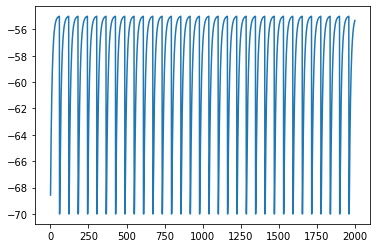

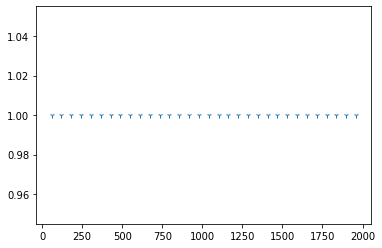

In [6]:
## plot the voltage and spikes
pylab.figure(1)
events_multi = nest.GetStatus(multimeter)[0]["events"]
pylab.plot(events_multi["times"], events_multi["V_m"])

pylab.figure(2)
events_spikes = nest.GetStatus(spikedetector,keys="events")[0]
pylab.plot(events_spikes["times"], events_spikes["senders"],"1")
pylab.show()

In [7]:
nest.Create?

In [8]:
# create a neuron with a Possionian input
neuron1 = nest.Create("iaf_neuron", params={"I_e":370.0})
# connect to an existing multimeter
nest.Connect(multimeter, neuron1)

In [9]:
nest.Simulate(1000)

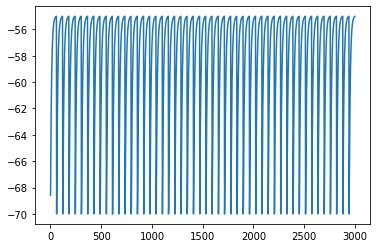

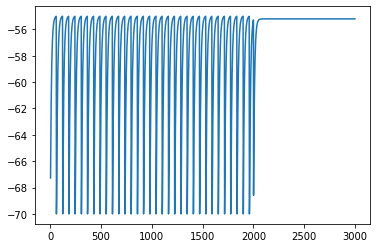

In [10]:
events_multi = nest.GetStatus(multimeter)[0]["events"]
pylab.figure(1)
pylab.plot(events_multi["times"][::2], events_multi["V_m"][::2])
pylab.figure(2)
pylab.plot(events_multi["times"][1::2], events_multi["V_m"][1::2])

### Poissonian input

In [12]:
# reset I_e to use Possionian noise as an input
noise_exci = nest.Create("poisson_generator", params={"rate":80000.0})
noise_inhi = nest.Create("poisson_generator", params={"rate":15000.0})
nest.SetStatus(neuron0, {"I_e":0.0})
nest.Connect(noise_exci, neuron0, syn_spec={"weight":1.2})
nest.Connect(noise_inhi, neuron0, syn_spec={"weight":-2.0})

In [13]:
nest.Simulate(1000)

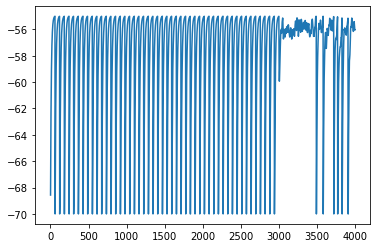

In [14]:
events_multi = nest.GetStatus(multimeter)[0]["events"]
pylab.figure(1)
pylab.plot(events_multi["times"][::2], events_multi["V_m"][::2])

# Ex 1

In [225]:
nest.ResetKernel()

### 2.a)

In [226]:
# make two diff types of neurons fire at 200 msec and record them
spike_gen = nest.Create("spike_generator", params={"spike_times":[200.0]})
neuron_exp = nest.Create("iaf_psc_exp")
nest.SetStatus(neuron_exp, {"tau_syn_ex":3.0})
neuron_alpha = nest.Create("iaf_psc_alpha")
nest.Connect(spike_gen, neuron_exp, syn_spec={"weight":4.7, "delay":1.0})
nest.Connect(spike_gen, neuron_alpha, syn_spec={"weight":2.0, "delay":1.0})
multimeter = nest.Create("multimeter", params={"withtime":True,"record_from":["V_m"]})
nest.Connect(multimeter, neuron_exp)
nest.Connect(multimeter, neuron_alpha)

In [227]:
nest.Simulate(1000)

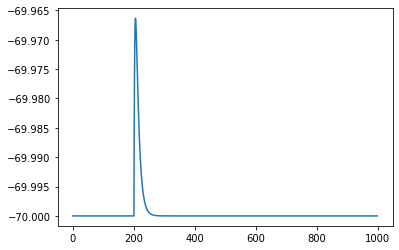

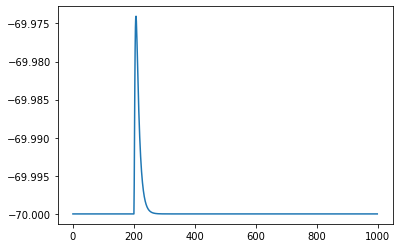

In [228]:
res_multi = nest.GetStatus(multimeter)[0]["events"]
pylab.figure(1)
pylab.plot(res_multi["times"][::2], res_multi["V_m"][::2])
pylab.figure(2)
pylab.plot(res_multi["times"][1::2], res_multi["V_m"][1::2])
pylab.show()

In [229]:
# start of the rise and the spike time, max values
start_exp = np.where(res_multi["V_m"][::2] != -70)[0][0]
argmax_exp = np.argmax(res_multi["V_m"][::2])
max_exp = np.max(res_multi["V_m"][::2])

start_alpha = np.where(res_multi["V_m"][1::2] != -70)[0][0]
argmax_alpha = np.argmax(res_multi["V_m"][1::2])
max_alpha = np.max(res_multi["V_m"][1::2])

In [231]:
argmax_exp-start_exp

4

In [233]:
argmax_alpha-start_alpha

6

### 2.b)

### 3.a)